### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Data Load & EDA

In [2]:
df= pd.read_csv("../data/customer_data_train.csv")
print(df.info())
print(df.describe())

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None
                  ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      7239.000000  7733.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      2595.381232    16.711696 

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


**Insights from the Data Exploration**

Missing Values:
    Ever_Married, Graduated, Profession, Work_Experience, Family_Size, and Var_1 have missing values.
    Work_Experience and Family_Size are numerical, while others are categorical.


Feature Types:
    ID is an identifier (not useful for modeling).
    Age, Work_Experience, and Family_Size are numerical features.
    Gender, Ever_Married, Graduated, Profession, Spending_Score, and Var_1 are categorical features.
    Segmentation is the target variable (for classification).

Outliers and Distributions:
    Work_Experience ranges from 0 to 14, with a median of 1, meaning most customers have very little work experience.
    Family_Size goes up to 9, but the median is 3, meaning larger families are less common.
    Age is normally distributed, ranging from 18 to 89, with a median of 40.
    
Next Step: 

1. X Drop ID column

2. X Convert Work_Experience and Family_Size to int from float

3. Handling Missing Values
    Now, we need to decide how to handle the missing values:

    1. X Numerical Features (Work_Experience, Family_Size)
       Fill with the median or mean
    2. X Categorical Features (Ever_Married, Graduated, Profession, Var_1)
       Fill with the mode (most frequent value)?
       Or create a new category like "Unknown"?

Keeping a back up of original dataframe and dropping ID since
it's not useful for clustering work we're trying to do 

In [3]:
#Make Backup
df_backup = df.copy()

In [4]:
#Load the backup
df=df_backup.copy()

In [5]:
df.drop(columns=["ID"] ,axis=1,inplace=True)

Let's explore the uniques values in each column

In [6]:
for col in df:
    print(print(f"`{col}` Unique values : \n {df[col].unique()}"))

`Gender` Unique values : 
 ['Male' 'Female']
None
`Ever_Married` Unique values : 
 ['No' 'Yes' nan]
None
`Age` Unique values : 
 [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
None
`Graduated` Unique values : 
 ['No' 'Yes' nan]
None
`Profession` Unique values : 
 ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
None
`Work_Experience` Unique values : 
 [ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
None
`Spending_Score` Unique values : 
 ['Low' 'Average' 'High']
None
`Family_Size` Unique values : 
 [ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]
None
`Var_1` Unique values : 
 ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
None
`Segmentation` Unique values : 
 ['D' 'A' 'B' 'C']
None


In [7]:
# Fill Numeric column empty data with median and convert to int 
df['Work_Experience'].fillna(df['Work_Experience'].median(), inplace=True)
df['Work_Experience'] = df['Work_Experience'].astype(int)

df['Family_Size'].fillna(df['Family_Size'].median(), inplace=True)
df['Family_Size'] = df['Family_Size'].astype(int)
df.head(2)

/tmp/ipykernel_187977/1541421082.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Work_Experience'].fillna(df['Work_Experience'].median(), inplace=True)
/tmp/ipykernel_187977/1541421082.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1,Low,4,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1,Average,3,Cat_4,A


Analize Object type columns to find strategy of filling missing data 

In [8]:
# Iterate though object columns only
for col in df.select_dtypes(include=['object']):  
    print(f"`{col}`\n{df[col].value_counts()}\n")

`Gender`
Gender
Male      4417
Female    3651
Name: count, dtype: int64

`Ever_Married`
Ever_Married
Yes    4643
No     3285
Name: count, dtype: int64

`Graduated`
Graduated
Yes    4968
No     3022
Name: count, dtype: int64

`Profession`
Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64

`Spending_Score`
Spending_Score
Low        4878
Average    1974
High       1216
Name: count, dtype: int64

`Var_1`
Var_1
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: count, dtype: int64

`Segmentation`
Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64



In [9]:
# Filling in Catagorical Data with Most frequent ones(Mode)
for col in df.select_dtypes(include=['object']):
    df.fillna({col: df[col].mode()[0]}, inplace=True) #updated code

In [10]:
print(df.isnull().sum())


Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


Our missing values have been taken care 

In [11]:
print(df.describe())
df.describe(include=['object'])

               Age  Work_Experience  Family_Size
count  8068.000000      8068.000000  8068.000000
mean     43.466906         2.472980     2.856346
std      16.711696         3.265248     1.499577
min      18.000000         0.000000     1.000000
25%      30.000000         0.000000     2.000000
50%      40.000000         1.000000     3.000000
75%      53.000000         4.000000     4.000000
max      89.000000        14.000000     9.000000


,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,8068,8068,8068,8068,8068,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4783,5046,2640,4878,5314,2268


### Visualization 

Purpose is to gather further understanding of data distribution 

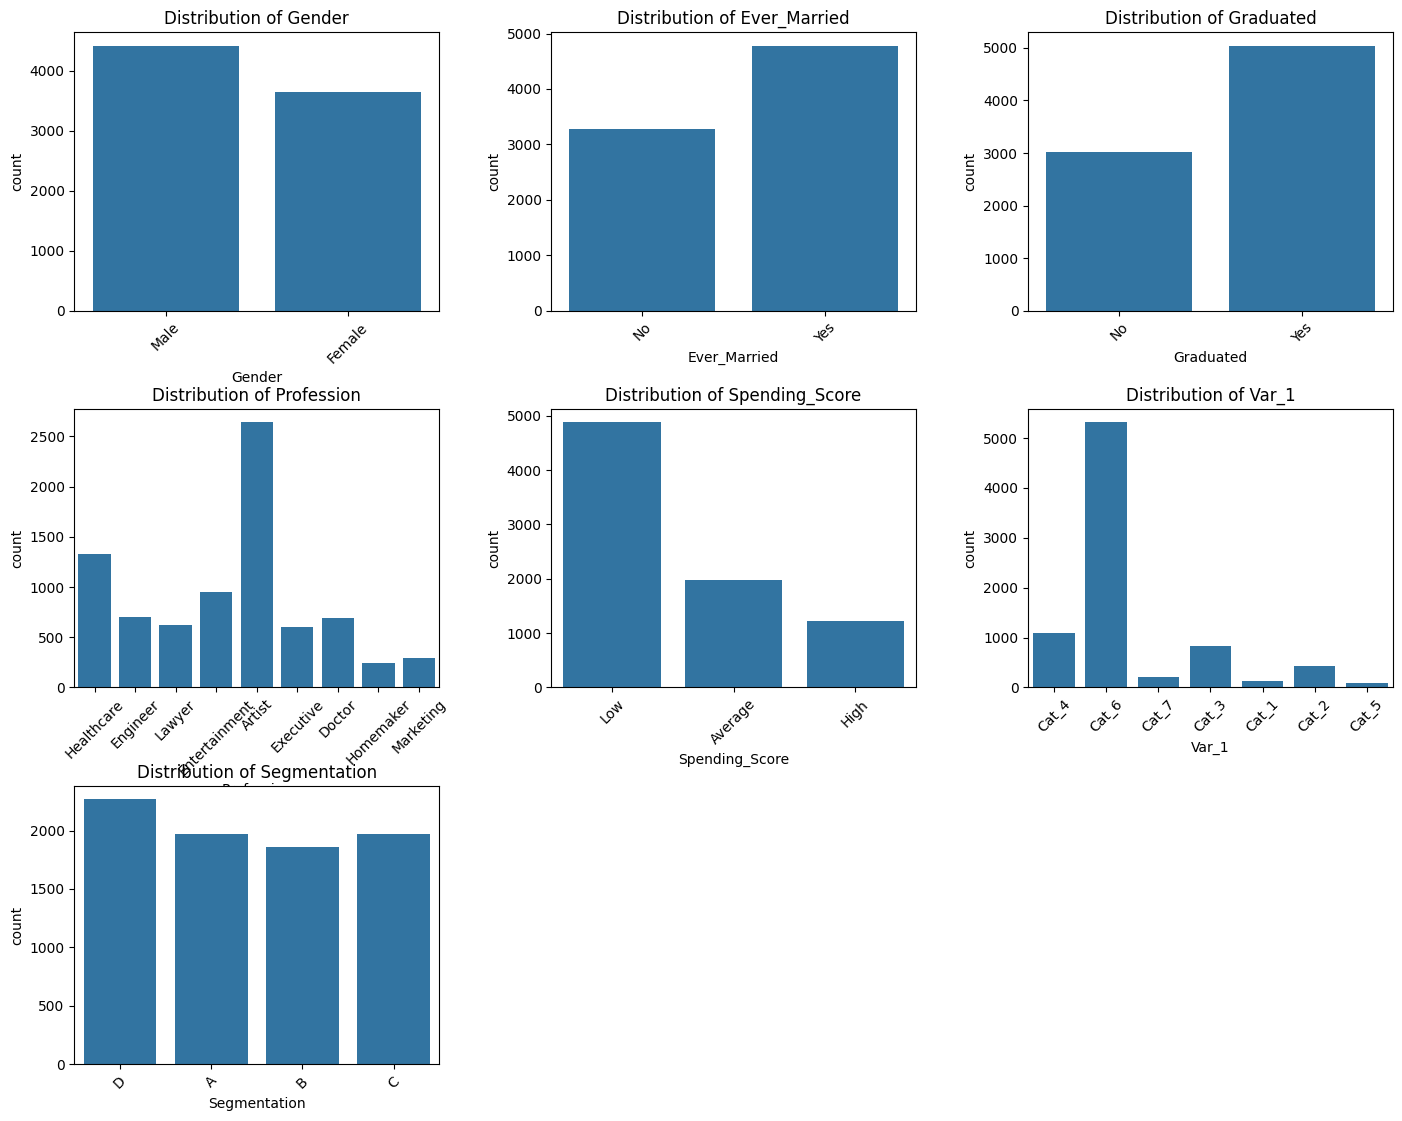

In [12]:

# Plot the distribution of categorical features
def plot_catagorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Number of categorical features
    num_categorical = len(categorical_columns)

    # Create a 3x4 grid of subplots
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  
    fig.tight_layout(pad=5.0)

    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        sns.countplot(x=col, data=df, ax=axes[i])  
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)  

    # Hide empty subplots just in case 
    for j in range(num_categorical, len(axes)):
        axes[j].axis('off')

    plt.show()
    
plot_catagorical_columns(df)


Cat_6 and Artist from Var_1 and Profession column seem a bit over populated. However i can not think of any solution to solve it using data augmentation 

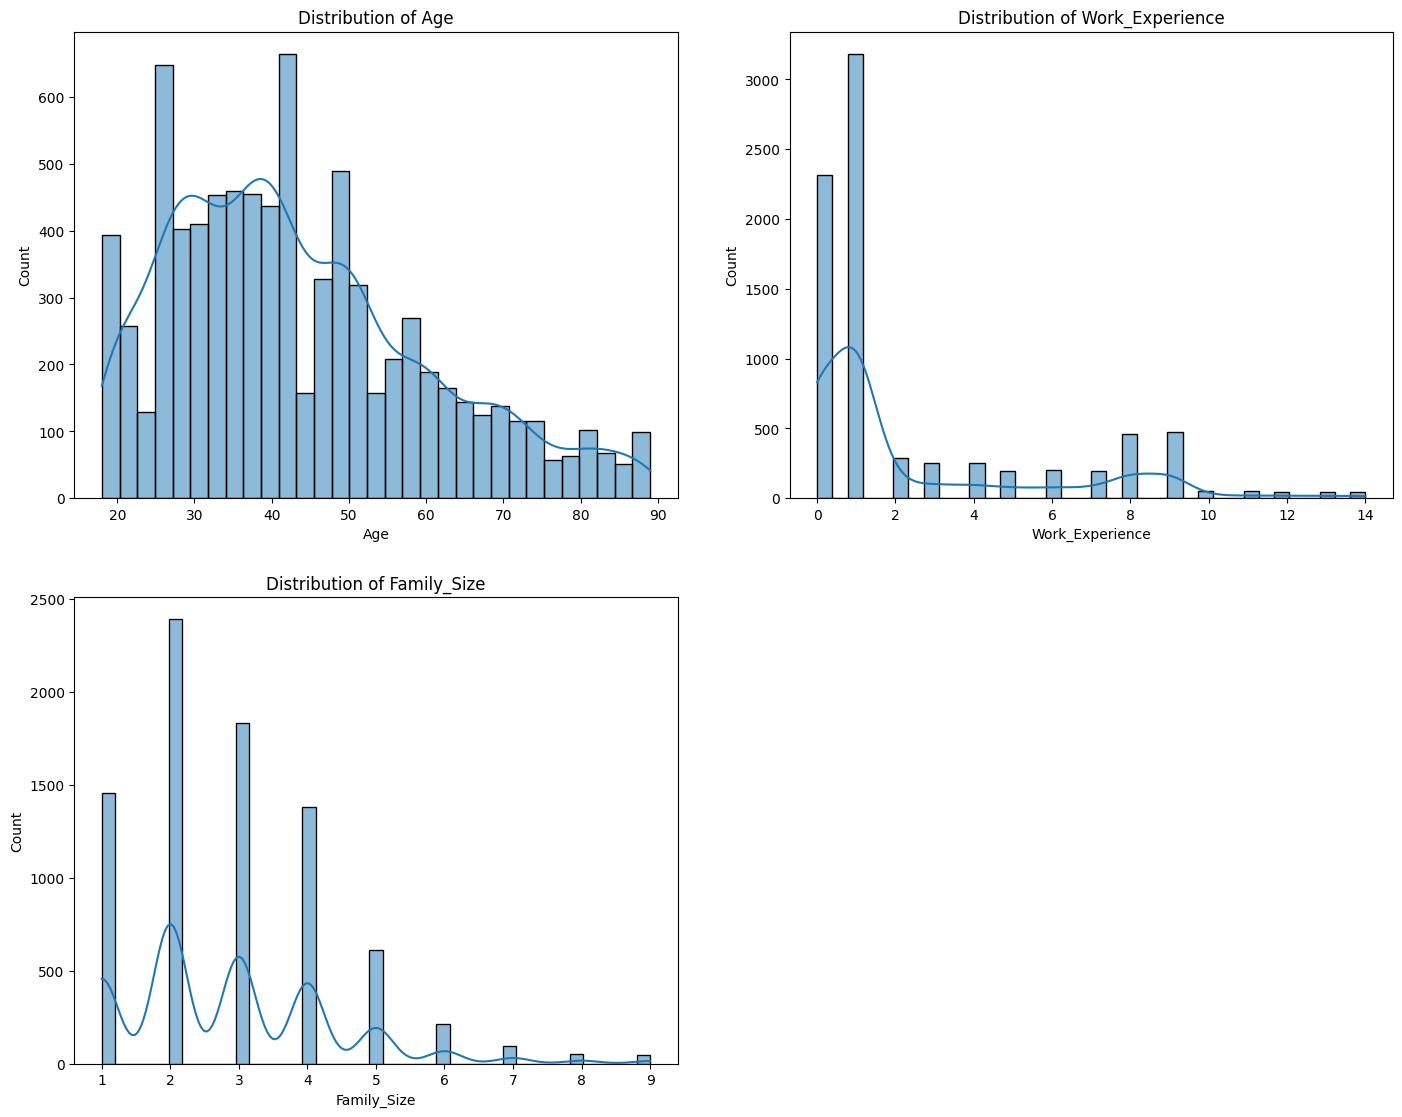

In [13]:
# Plot the distribution of Numerical features


def plot_numerical_columns(df):
    numerical_columns = df.select_dtypes(include=['number']).columns

    # Number of numerical features
    num_numerical = len(numerical_columns)

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))  # 3 rows, 4 columns
    fig.tight_layout(pad=5.0)

    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        sns.histplot(df[col], kde=True, ax=axes[i])  
        axes[i].set_title(f'Distribution of {col}')

    # Hide potential empty subplots 
    for j in range(num_numerical, len(axes)):
        axes[j].axis('off')
        plt.show()
        
plot_numerical_columns(df)




Here we see Distribution of family size and work experience would be more useful and compact if converted into catagories since the data is a bit imbalanced for some of the values.

In [14]:
df['Work_Experience_Group'] = pd.cut(df['Work_Experience'], 
                                     bins=[-1, 0, 1, 5, 20],  
                                     labels=['0', '1', '2-5', '6-20']) 
df['Work_Experience_Group'] = df['Work_Experience_Group'].astype(str)
df['Family_Size_Catagory'] = pd.cut(df['Family_Size'], bins=[-1, 2, 5, 9], labels=['Small', 'Medium', 'Large'])
df['Family_Size_Catagory'] = df['Family_Size_Catagory'].astype(str)


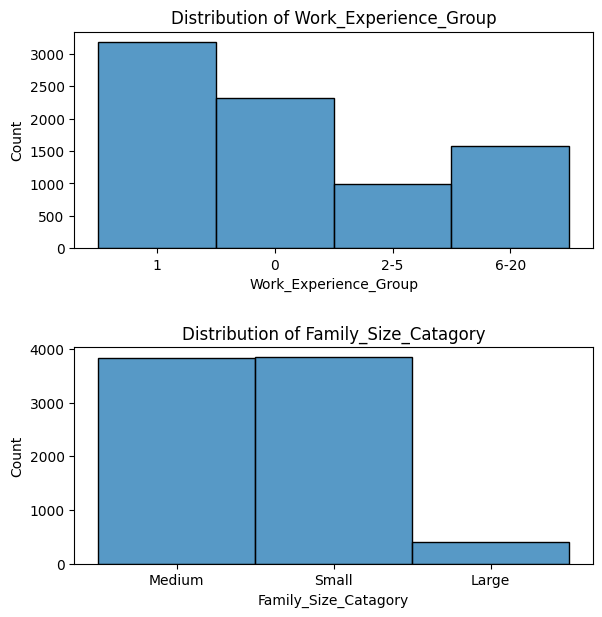

In [15]:
new_columns = ['Work_Experience_Group','Family_Size_Catagory']
new_col_list_size = len(new_columns)

fig,axes = plt.subplots(nrows=2,ncols=1,figsize = (7,7))
fig.tight_layout(pad=5.0)

for i,col in enumerate(new_columns):
    sns.histplot(df[col],ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    
for j in range(new_col_list_size, len(axes)):
    axes[j].axis('off')
    
plt.show()


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 8068 non-null   object
 1   Ever_Married           8068 non-null   object
 2   Age                    8068 non-null   int64 
 3   Graduated              8068 non-null   object
 4   Profession             8068 non-null   object
 5   Work_Experience        8068 non-null   int64 
 6   Spending_Score         8068 non-null   object
 7   Family_Size            8068 non-null   int64 
 8   Var_1                  8068 non-null   object
 9   Segmentation           8068 non-null   object
 10  Work_Experience_Group  8068 non-null   object
 11  Family_Size_Catagory   8068 non-null   object
dtypes: int64(3), object(9)
memory usage: 756.5+ KB


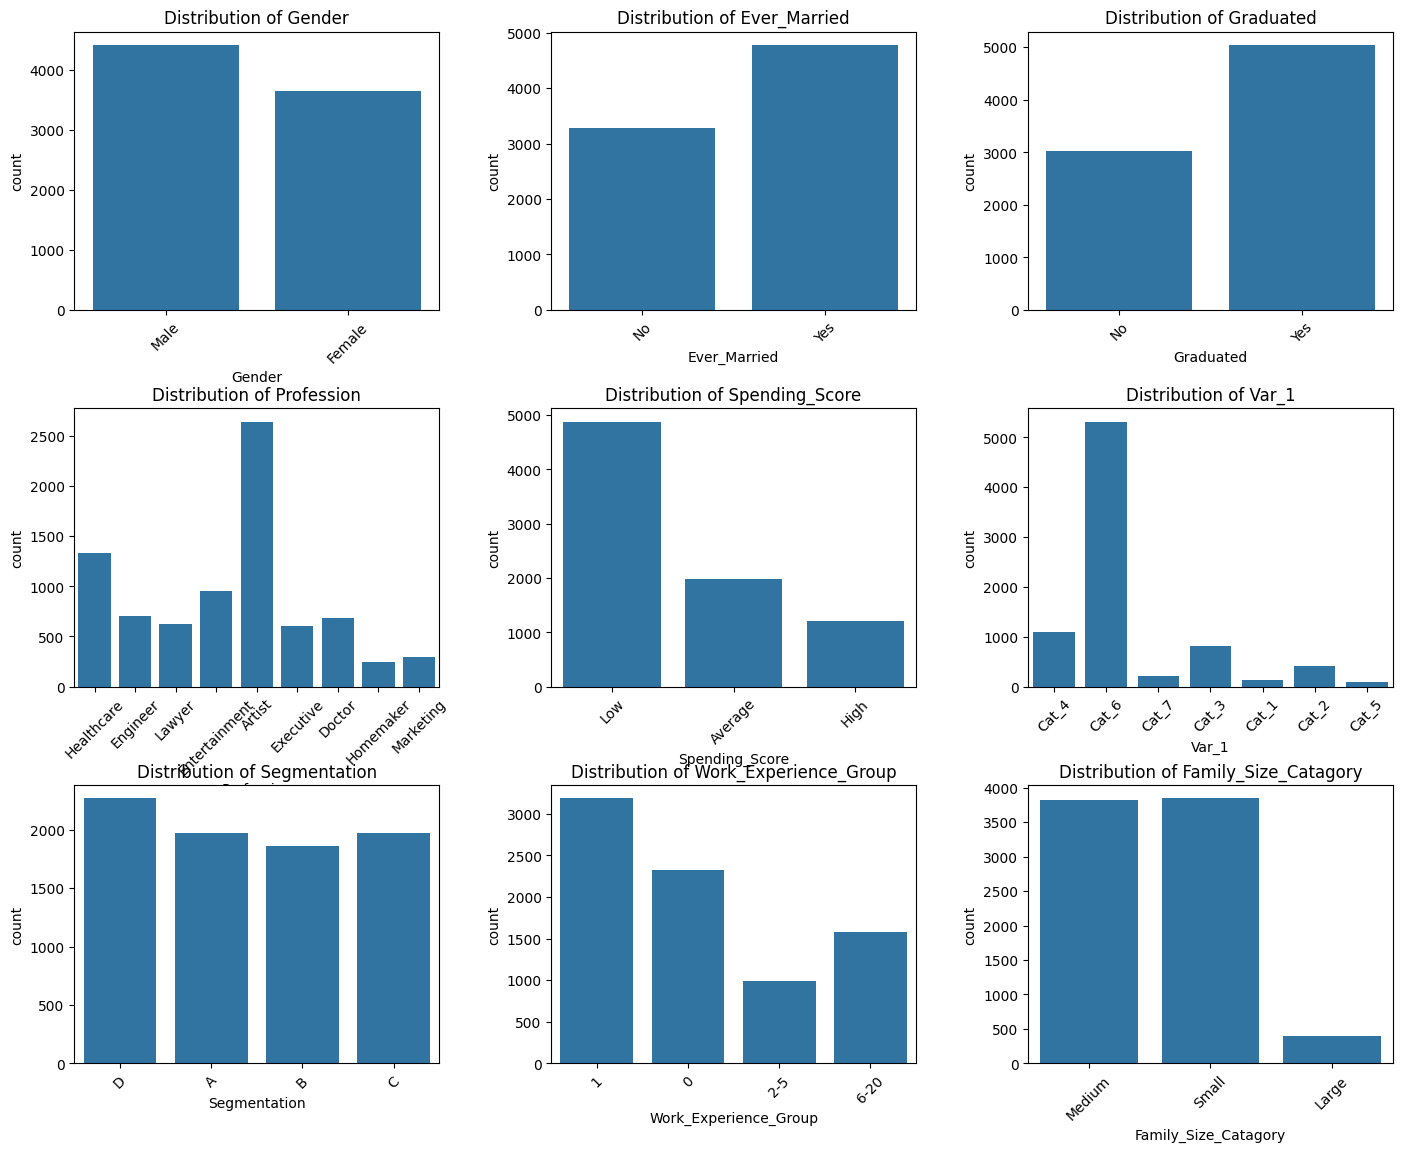

In [17]:

# After adding new columns 

plot_catagorical_columns(df)



Next Step: Understanding Feature Relationships

**Key idea is , We want to find features that do not have even interclass percentage score for segments . If a feature has scewed distribution for the segmentation, means it has an impact on the segmentaion**


Now that we have categorized Work Experience and Family Size, we should analyze how different features relate to each other.

🔹 Objective: Identify patterns that will help in segmentation.
🔹 How: Use visualizations to explore relationships between categorical and numerical features.

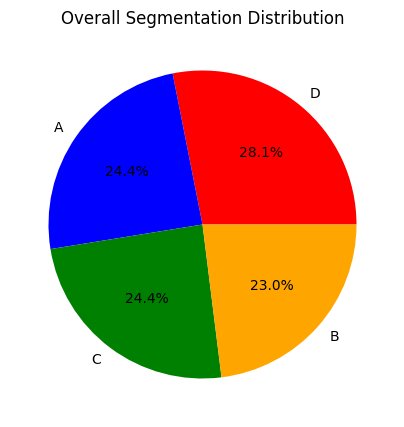

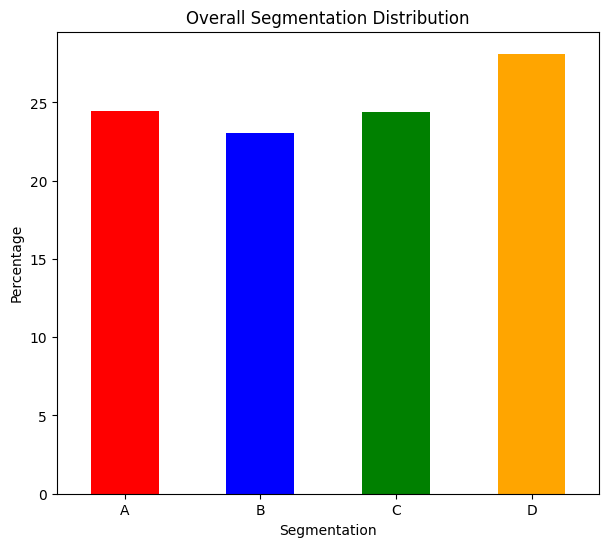

In [18]:

# Calculate percentages
seg_counts = df['Segmentation'].value_counts(normalize=True) * 100

# Define colors
colors = ['red','blue','green','orange']

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(seg_counts, labels=seg_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Overall Segmentation Distribution')
plt.show()

# Bar plot
plt.figure(figsize=(7, 6))
seg_counts.sort_index().plot(kind='bar', color=colors)
plt.ylabel('Percentage')
plt.title('Overall Segmentation Distribution')
plt.xticks(rotation=0)
plt.show()


The Segementaion is evenly distributed 

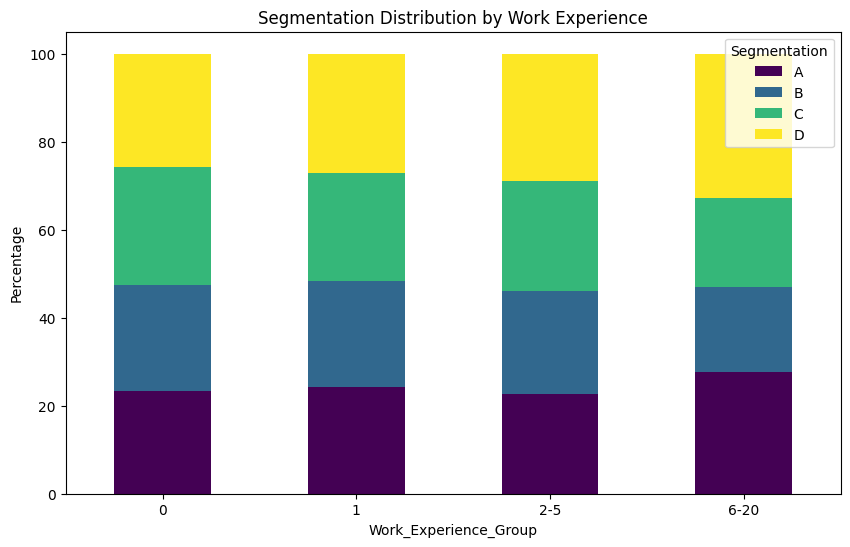

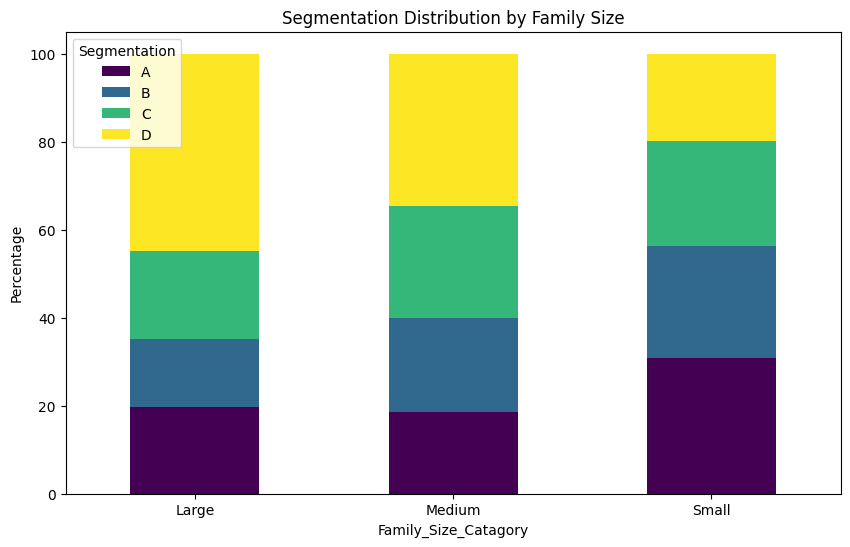

In [19]:
def plot_normalized_stacked_bar(feature, title):
    # Create a normalized table (percentage within each category)
    grouped = df.groupby(feature)['Segmentation'].value_counts(normalize=True).unstack() * 100
    
    grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.ylabel("Percentage")
    plt.title(title)
    plt.xticks(rotation=0)
    plt.legend(title="Segmentation")
    plt.show()

plot_normalized_stacked_bar('Work_Experience_Group', "Segmentation Distribution by Work Experience")
plot_normalized_stacked_bar('Family_Size_Catagory', "Segmentation Distribution by Family Size")


/tmp/ipykernel_187977/3369244659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segmentation', y='Spending_Score', data=df, palette='viridis')


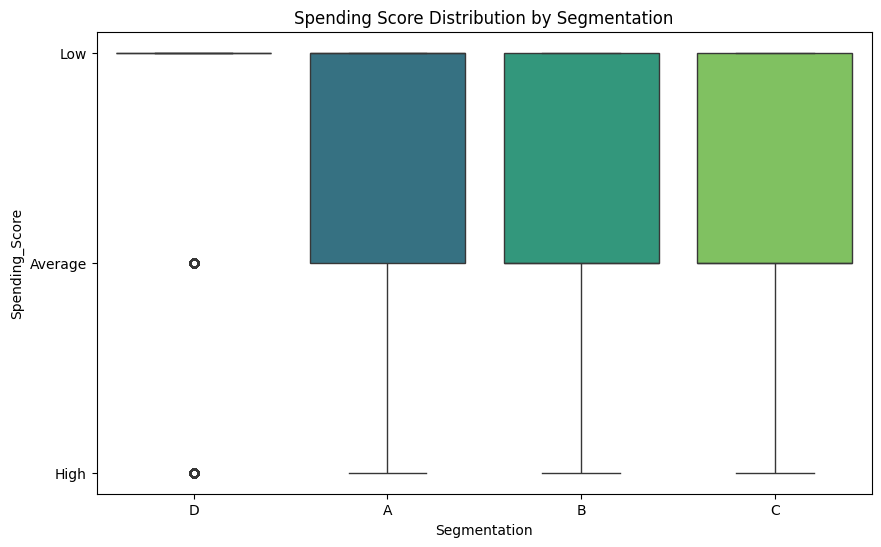

In [20]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Segmentation', y='Spending_Score', data=df, palette='viridis')
plt.title("Spending Score Distribution by Segmentation")
plt.show()


Here we see Spending score impacts Segmentation for class D .  We could use techniques like feature importance (e.g., decision trees or random forests) to confirm how impactful Spending Score is in distinguishing segments

To simpliofy which columns to analyze instead of going over all of them, we can map a corealtion heat map and pick the ones with significant corelation score.

For that we need to convert/encode catagorical features into numeric representation 

### Data Preprocessing & Segementation 

Before we go on with the analysis of features any further, i want to try to create possibly better segmentation for the given data 


Next Step : 
 
 1. Encode Catagorical Features
 2. Scale Numerical Features 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 8068 non-null   object
 1   Ever_Married           8068 non-null   object
 2   Age                    8068 non-null   int64 
 3   Graduated              8068 non-null   object
 4   Profession             8068 non-null   object
 5   Work_Experience        8068 non-null   int64 
 6   Spending_Score         8068 non-null   object
 7   Family_Size            8068 non-null   int64 
 8   Var_1                  8068 non-null   object
 9   Segmentation           8068 non-null   object
 10  Work_Experience_Group  8068 non-null   object
 11  Family_Size_Catagory   8068 non-null   object
dtypes: int64(3), object(9)
memory usage: 756.5+ KB


| Column                  | Type        | Encoding/Scaling                                    | Reason                                                                 |
|-------------------------|-------------|-----------------------------------------------------|------------------------------------------------------------------------|
| **Gender**              | Categorical | One-Hot Encode (nominal, no order)                  | Gender is a nominal categorical variable with no inherent order.      |
| **Ever_Married**        | Categorical | One-Hot Encode (nominal, no order)                  | Binary categorical variable (Yes/No) without any order.               |
| **Age**                 | Numerical   | Scale (standardize or normalize)                    | Age is continuous, scaling helps normalize the range.                 |
| **Graduated**           | Categorical | One-Hot Encode (nominal, no order)                  | Binary categorical variable (Yes/No), no order.                       |
| **Profession**          | Categorical | One-Hot Encode (nominal, no order)                  | Nominal categorical variable with no order.                           |
| **Work_Experience**     | Numerical   | Scale (standardize or normalize)                    | Continuous feature, scaling ensures consistency.                       |
| **Spending_Score**      | Categorical | Label Encode or One-Hot Encode (ordinal or nominal) | Ordinal (if Low, Medium, High) or nominal depending on context.       |
| **Family_Size**         | Numerical   | Scale (standardize or normalize)                    | Continuous feature, scaling ensures consistency.                       |
| **Var_1**               | Categorical | One-Hot Encode (nominal, no order)                  | Nominal categorical variable with no inherent order.                 |
| **Work_Experience_Group**| Categorical | Label Encode (ordinal, ordered)                     | Ordered categories like "Junior", "Mid-Level", "Senior".              |
| **Family_Size_Category**| Categorical | Label Encode or One-Hot Encode (ordinal categories) | Ordinal categories like "Small", "Medium", "Large" (Label Encode).    |


In [22]:
df_before_preprocess_backup = df.copy() 

1. One hot encoding for nomical catagorical columns 

In [23]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1'], drop_first=True)
df_encoded.head()

,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,Work_Experience_Group,Family_Size_Catagory,Gender_Male,Ever_Married_Yes,Graduated_Yes,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1,Low,4,D,1,Medium,True,False,False,...,True,False,False,False,False,False,True,False,False,False
1,38,1,Average,3,A,1,Medium,False,True,True,...,False,False,False,False,False,False,True,False,False,False
2,67,1,Low,1,B,1,Small,False,True,True,...,False,False,False,False,False,False,False,False,True,False
3,67,0,High,2,B,0,Small,True,True,True,...,False,False,True,False,False,False,False,False,True,False
4,40,1,High,6,A,1,Large,False,True,True,...,False,False,False,False,False,False,False,False,True,False


2. Scaling Numerical Features

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['Age', 'Work_Experience', 'Family_Size']] = scaler.fit_transform(df_encoded[['Age', 'Work_Experience', 'Family_Size']])


In [25]:
df_encoded.head()

,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,Work_Experience_Group,Family_Size_Catagory,Gender_Male,Ever_Married_Yes,Graduated_Yes,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,-1.284623,-0.451136,Low,0.762698,D,1,Medium,True,False,False,...,True,False,False,False,False,False,True,False,False,False
1,-0.327151,-0.451136,Average,0.095802,A,1,Medium,False,True,True,...,False,False,False,False,False,False,True,False,False,False
2,1.408268,-0.451136,Low,-1.237990,B,1,Small,False,True,True,...,False,False,False,False,False,False,False,False,True,False
3,1.408268,-0.757410,High,-0.571094,B,0,Small,True,True,True,...,False,False,True,False,False,False,False,False,True,False
4,-0.207467,-0.451136,High,2.096491,A,1,Large,False,True,True,...,False,False,False,False,False,False,False,False,True,False


3. Label Encoding for Ordinal Categorical Columns

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_encoded['Work_Experience_Group'] = le.fit_transform(df_encoded['Work_Experience_Group'])
df_encoded['Spending_Score'] = le.fit_transform(df_encoded['Spending_Score'])
df_encoded['Family_Size_Catagory'] = le.fit_transform(df_encoded['Family_Size_Catagory'])


In [27]:
print(df_encoded['Spending_Score'][:3])
print(df['Spending_Score'][:3])



0    2
1    0
2    2
Name: Spending_Score, dtype: int64
0        Low
1    Average
2        Low
Name: Spending_Score, dtype: object


As we can see, it's encoding low for 2 , meaning it's assigning high value for `low` . 

Since these are ordinal data, we need to be careful about these, hence we need to manually set values for each class.


In [28]:
ordinal_cols = ['Work_Experience_Group', 'Spending_Score', 'Family_Size_Catagory']

for col in ordinal_cols:
    print(col)
    print (df[col].unique())
    


Work_Experience_Group
['1' '0' '2-5' '6-20']
Spending_Score
['Low' 'Average' 'High']
Family_Size_Catagory
['Medium' 'Small' 'Large']


Now we create a map of order then encode the lables 

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

work_experience_map = {'0': 0, '1': 1, '2-5': 2, '6-20': 3}
spending_score_map = {'Low': 0, 'Average': 1, 'High': 2}
family_size_map = {'Small': 0, 'Medium': 1, 'Large': 2}

# need to assign from backup since we have already modifeid this column in our previous experiment with the same columns 
df_encoded['Work_Experience_Group'] = df_before_preprocess_backup['Work_Experience_Group'].map(work_experience_map)

df_encoded['Spending_Score'] = df_before_preprocess_backup['Spending_Score'].map(spending_score_map)

df_encoded['Family_Size_Catagory'] = df_before_preprocess_backup['Family_Size_Catagory'].map(family_size_map)


In [30]:
print(df_encoded['Spending_Score'][:6])
print(df_before_preprocess_backup['Spending_Score'][:6])

0    0
1    1
2    0
3    2
4    2
5    1
Name: Spending_Score, dtype: int64
0        Low
1    Average
2        Low
3       High
4       High
5    Average
Name: Spending_Score, dtype: object


Now that we have done encoding and standardization , now we need to do feature selection before we start with
segmentation;in order to reduce noise and unnecessary complexcity.

In [31]:
df_encoded.T.head(24)[0]

Age                        -1.284623
Work_Experience            -0.451136
Spending_Score                     0
Family_Size                 0.762698
Segmentation                       D
Work_Experience_Group              1
Family_Size_Catagory               1
Gender_Male                     True
Ever_Married_Yes               False
Graduated_Yes                  False
Profession_Doctor              False
Profession_Engineer            False
Profession_Entertainment       False
Profession_Executive           False
Profession_Healthcare           True
Profession_Homemaker           False
Profession_Lawyer              False
Profession_Marketing           False
Var_1_Cat_2                    False
Var_1_Cat_3                    False
Var_1_Cat_4                     True
Var_1_Cat_5                    False
Var_1_Cat_6                    False
Var_1_Cat_7                    False
Name: 0, dtype: object

In [32]:
df_prep_segment = df_encoded.copy()

In [33]:
df_encoded_backup = df_encoded.copy()

df_encoded = df_encoded.drop(columns=['Segmentation'])


In [34]:
df_encoded = df_encoded.drop(columns=['Var_1_Cat_2','Var_1_Cat_3','Var_1_Cat_4','Var_1_Cat_5','Var_1_Cat_6', 'Var_1_Cat_7'  ])


For clustering, we should have only numerical values. double-check:
 1. Ensure no categorical features remain unencoded.
 2. Make sure binary encoded columns (e.g., Gender_Male, Ever_Married_Yes, etc.) are still numerical (0 or 1).

In [35]:
print(df_encoded.dtypes)


Age                         float64
Work_Experience             float64
Spending_Score                int64
Family_Size                 float64
Work_Experience_Group         int64
Family_Size_Catagory          int64
Gender_Male                    bool
Ever_Married_Yes               bool
Graduated_Yes                  bool
Profession_Doctor              bool
Profession_Engineer            bool
Profession_Entertainment       bool
Profession_Executive           bool
Profession_Healthcare          bool
Profession_Homemaker           bool
Profession_Lawyer              bool
Profession_Marketing           bool
dtype: object


Observation : 

1. **Numerical columns**: Age, Work_Experience, Spending_Score, Family_Size are all float64 or int64, which is perfect for clustering.

2. **Categorical columns**: The binary columns like Gender_Male, Ever_Married_Yes, Graduated_Yes, and profession categories (Profession_Doctor, Profession_Engineer, etc.) are all bool type, 
which is equivalent to numerical values (0 or 1), so they’re ready for clustering as well.

3. **Ordinal columns**: Work_Experience_Group and Family_Size_Catagory are int64, so they are also ready for clustering.

### Clustering

#### K-Means

**K-Means** is a clustering algorithm that groups data points into K clusters by minimizing the variance within each cluster. It starts by randomly selecting K centroids, then iteratively assigns each point to the nearest centroid and updates the centroids based on the mean of assigned points. This process repeats until convergence. However, because the initial centroid placement is random, poor initialization can lead to suboptimal clustering. The n_init parameter controls how many times K-Means runs with different centroid initializations, choosing the best result based on the lowest inertia. A higher n_init reduces the risk of poor local minima, leading to more stable and well-separated clusters.

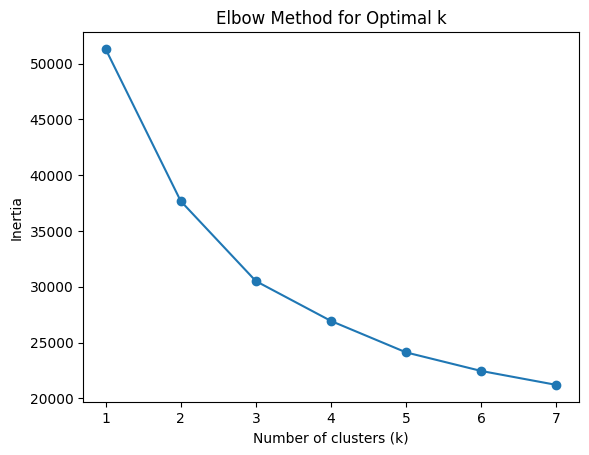

In [36]:
from sklearn.cluster import KMeans

inertia = [] 


for k in range(1,8):
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=30)
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 8), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [37]:
kmeans = KMeans(n_clusters=2, random_state=42,n_init=30)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded)


# Check the resulting clusters
print(df_encoded[['Age', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Cluster']].head())


        Age  Work_Experience  Spending_Score  Family_Size  Cluster
0 -1.284623        -0.451136               0     0.762698        1
1 -0.327151        -0.451136               1     0.095802        1
2  1.408268        -0.451136               0    -1.237990        1
3  1.408268        -0.757410               2    -0.571094        1
4 -0.207467        -0.451136               2     2.096491        1


**Principal Component Analysis (PCA)**   is often used to reduce the dimensionality of data while preserving as much variance as possible. When applied to clustering results, a PCA scatter plot provides a visual representation of how well the algorithm has separated different clusters. Each point represents a data sample, and the axes correspond to the first two principal components (PC1 and PC2), which capture the most significant variance in the dataset.

Interpreting the PCA plot involves analyzing the distribution and separation of clusters. Well-defined, non-overlapping groups indicate that the clustering algorithm has successfully distinguished distinct patterns in the data. If clusters are spread out with clear boundaries, the separation is strong. Conversely, overlapping clusters suggest that the features may not provide enough distinction, requiring parameter tuning or additional preprocessing. The presence of noise points (often labeled as -1 in DBSCAN) scattered across the plot indicates data that does not fit into any high-density region, reinforcing the algorithm’s ability to identify anomalies.

PCA is incorporated in evaluating clustering performance primarily as a visualization tool. Since clustering algorithms often work in high-dimensional spaces, PCA reduces the dimensionality while retaining the most significant variance, making it easier to assess the quality of clusters. By plotting the first two principal components (PC1 and PC2), we can observe how well-separated the clusters are.

If a clustering algorithm performs well, we expect to see distinct, non-overlapping groups in the PCA plot. Overlapping clusters suggest poor separability, indicating that the chosen features or clustering parameters may need adjustment. Additionally, PCA helps in detecting noise and outliers, which appear as scattered points outside dense clusters. However, since PCA reduces dimensionality, some information loss occurs, meaning that poor separation in PCA space doesn’t always imply poor clustering in the original feature space. Therefore, PCA should be used alongside quantitative clustering metrics like silhouette score, Davies-Bouldin index, and adjusted Rand index for a more comprehensive evaluation.

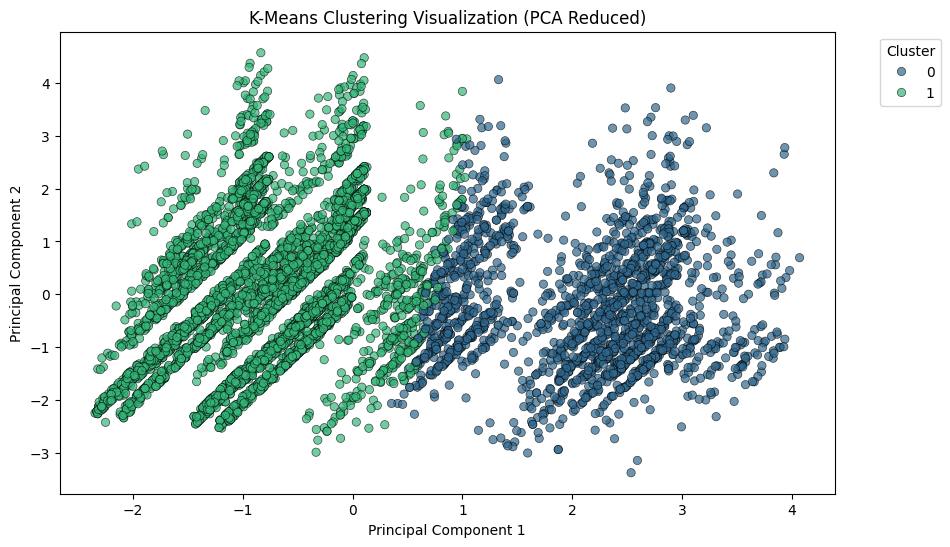

In [38]:
from sklearn.decomposition import PCA

# Assuming df_encoded contains the clustered data
# Extract features for PCA
features = df_encoded.drop(columns=['Cluster'])  # Exclude cluster column

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

# Convert to DataFrame for easy plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_encoded['Cluster']  # Add cluster labels

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=df_pca['Cluster'], palette='viridis', data=df_pca, alpha=0.7, edgecolor='k')
plt.title('K-Means Clustering Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


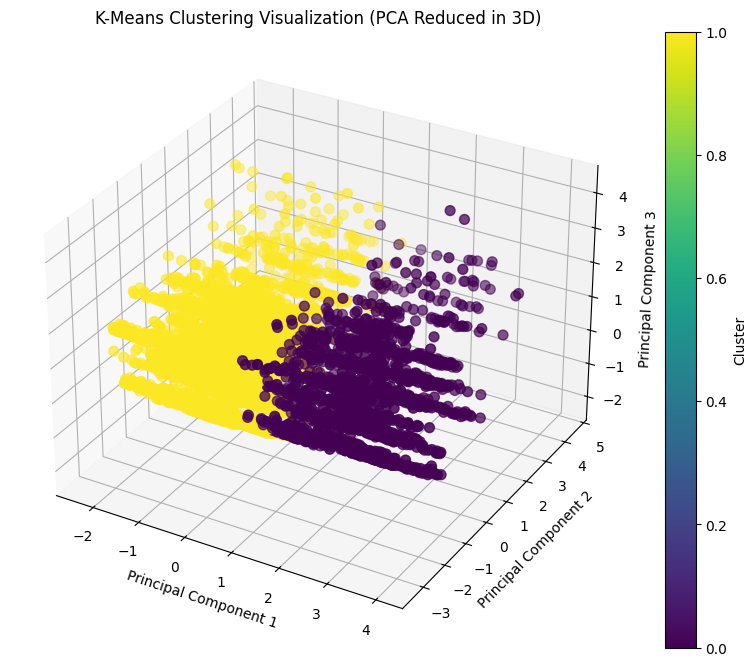

In [39]:
from sklearn.decomposition import PCA

# Extract features for PCA
features = df_encoded.drop(columns=['Cluster'])  # Exclude cluster column

# Apply PCA to reduce to 3D for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(features)

# Convert to DataFrame for easy plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = df_encoded['Cluster']  # Add cluster labels

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping based on clusters
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster'], cmap='viridis', s=50)

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('K-Means Clustering Visualization (PCA Reduced in 3D)')

# Add color bar

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

plt.show()


**Silhouette Score** and **Davies-Bouldin Score** are two 
key metrics for evaluating clustering quality. 

The Silhouette Score measures how similar a data point is 
to its own cluster compared to other clusters, 
ranging from -1 to 1. A higher score indicates 
well-separated and dense clusters. 

The Davies-Bouldin Score evaluates clustering compactness and
separation by computing the average ratio of within-cluster scatter 
to between-cluster distances. A lower score is better, 
indicating well-separated clusters with minimal overlap.
 Both metrics help assess clustering performance, 
 with Silhouette favoring compact clusters and
  Davies-Bouldin penalizing poorly separated ones.

In [40]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming df_encoded contains the clustered data
X = df_encoded.drop(columns=['Cluster'])  # Exclude the cluster column

# Calculate Silhouette Score
sil_score = silhouette_score(X, df_encoded['Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, df_encoded['Cluster'])
print(f'Davies-Bouldin Index: {db_index:.4f}')


Silhouette Score: 0.2833
Davies-Bouldin Index: 1.3985


#### DBSCAN

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups data points based on density rather than distance to centroids.

It identifies dense regions as clusters and labels points in sparse areas as noise, making it effective for discovering clusters of arbitrary shapes. The algorithm relies on two key parameters: eps (the maximum distance within which points are considered neighbors) and min_samples (the minimum number of points required to form a dense region).

A silhouette score can be used to evaluate clustering quality by measuring how similar each point is to its own cluster compared to other clusters. Since DBSCAN allows noise points, the silhouette score might vary based on the number of detected outliers. Visualization techniques, such as plotting principal components, can help interpret the clustering structure and assess the separation between identified groups.

Best DBSCAN Parameters -> eps: 1.2, min_samples: 3, metric: manhattan
Best Silhouette Score: 0.2664


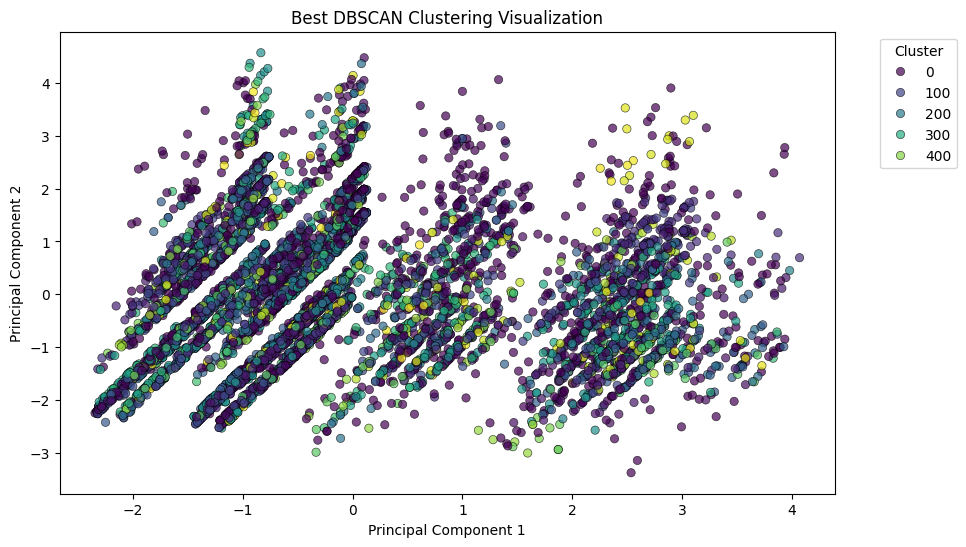

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Scale the features first (important for distance-based methods like DBSCAN)
#features = df_encoded.drop(columns=['Cluster'])  # Exclude cluster column
features = df_encoded.drop(columns=['Hierarchical_Cluster','GMM_Cluster','DBSCAN_Cluster','Cluster'])  # Exclude cluster column

features_scaled = StandardScaler().fit_transform(features)  # Scale the features

# Define a range of parameters to test
eps_values = np.arange(0.2, 2.0, 0.2)  # Try different values for eps
min_samples_values = range(3, 10)  # Try different values for min_samples
metrics = ['euclidean', 'manhattan', 'cosine']  # List of metrics to try

best_eps = None
best_min_samples = None
best_metric = None
best_silhouette = -1
best_clusters = None

# Iterate over different parameter combinations and metrics
for eps in eps_values:
    for min_samples in min_samples_values:
        for metric in metrics:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
            clusters = dbscan.fit_predict(features_scaled)

            # Only evaluate silhouette score if more than 1 cluster exists
            if len(set(clusters)) > 1:
                score = silhouette_score(features_scaled, clusters)
                if score > best_silhouette:
                    best_silhouette = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_metric = metric
                    best_clusters = clusters

# Apply the best DBSCAN clustering
df_encoded['DBSCAN_Cluster'] = best_clusters
print(f'Best DBSCAN Parameters -> eps: {best_eps}, min_samples: {best_min_samples}, metric: {best_metric}')
print(f'Best Silhouette Score: {best_silhouette:.4f}')

# Visualize the best clustering result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=df_encoded['DBSCAN_Cluster'], palette='viridis', data=df_pca, alpha=0.7, edgecolor='k')
plt.title('Best DBSCAN Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Best DBSCAN Parameters -> eps: 1.8, min_samples: 3
Best Silhouette Score: 0.3842

#### Gaussian Mixture

The **Gaussian Mixture Model** (GMM) is a probabilistic clustering technique that assumes data is generated from a mixture of multiple Gaussian distributions. Unlike K-Means, which assigns points to clusters based on distance to centroids, GMM calculates the probability of each point belonging to different clusters and assigns it to the most likely one. This allows for soft clustering, meaning points can have partial membership in multiple clusters rather than being strictly assigned to one. GMM works well when clusters have elliptical shapes or when variance differs across clusters, making it more flexible than K-Means. The Expectation-Maximization (EM) algorithm is used to iteratively refine the Gaussian distributions' parameters (mean, covariance, and weights) until convergence. A key aspect of evaluating GMM clustering is using metrics like the Bayesian Information Criterion (BIC) or silhouette score to determine the optimal number of clusters. However, GMM assumes that data follows a Gaussian distribution, which may not always be the case, leading to suboptimal results in complex, non-Gaussian datasets.

GMM with 2 components - Silhouette Score: 0.2634
GMM with 3 components - Silhouette Score: 0.1014
GMM with 4 components - Silhouette Score: 0.0691
GMM with 5 components - Silhouette Score: 0.0300
GMM with 6 components - Silhouette Score: 0.0716
GMM with 7 components - Silhouette Score: -0.0165
GMM with 8 components - Silhouette Score: 0.0560
GMM with 9 components - Silhouette Score: 0.0727
Best number of components: 2 with silhouette score 0.2634


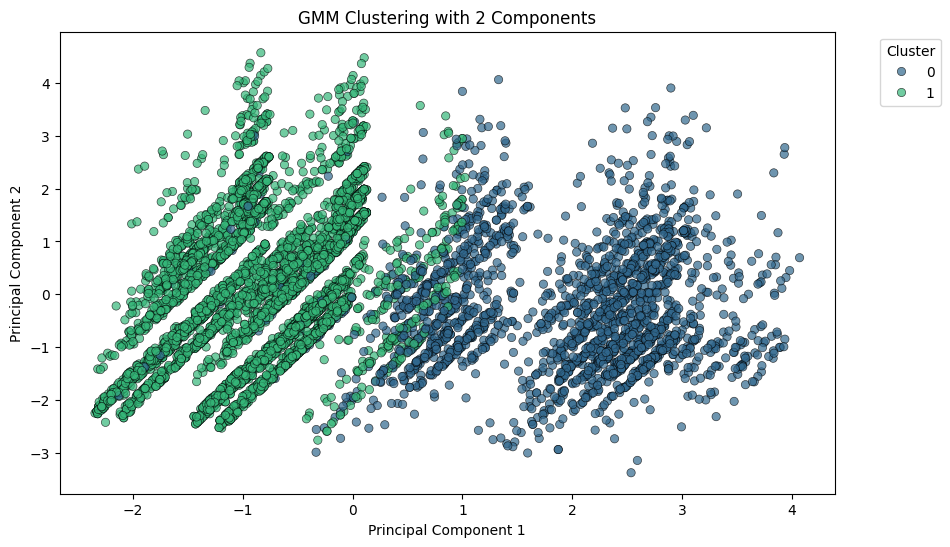

In [42]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

best_n = None
best_score = -1
best_clusters = None
features = df_encoded.drop(columns=['Hierarchical_Cluster','GMM_Cluster','DBSCAN_Cluster','Cluster'])  # Exclude cluster column

# Try different numbers of components and find the best one
for n in range(2, 10):  # Experiment with n_components from 2 to 10
    gmm = GaussianMixture(n_components=n, random_state=42)
    clusters = gmm.fit_predict(features)
    
    # Compute silhouette score (only if more than 1 cluster is found)
    if len(set(clusters)) > 1:
        score = silhouette_score(features, clusters)
        print(f'GMM with {n} components - Silhouette Score: {score:.4f}')
        
        if score > best_score:
            best_score = score
            best_n = n
            best_clusters = clusters

# Apply the best GMM model
print(f'Best number of components: {best_n} with silhouette score {best_score:.4f}')
df_encoded['GMM_Cluster'] = best_clusters

# Visualization of the best GMM Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=df_encoded['GMM_Cluster'], palette='viridis', data=df_pca, alpha=0.7, edgecolor='k')
plt.title(f'GMM Clustering with {best_n} Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



Best number of components: 2 with silhouette score 0.2634

#### Agglomerative Clustering

**Agglomerative Clustering** is a hierarchical clustering algorithm that builds clusters in a bottom-up fashion. It starts with each data point as an individual cluster and then merges the closest pairs iteratively until a stopping criterion is met, such as reaching a predefined number of clusters. Unlike K-Means or GMM, Agglomerative Clustering does not require specifying initial cluster centers but instead relies on linkage criteria such as ward, complete, average, or single linkage to determine how clusters are merged. To determine the optimal number of clusters, silhouette scores can be used by evaluating different values and selecting the one that maximizes the score. The final clusters can be visualized using PCA to project high-dimensional data into two dimensions, helping to interpret how well the clustering structure is formed. 

Best number of clusters: 2 with silhouette score: 0.3070


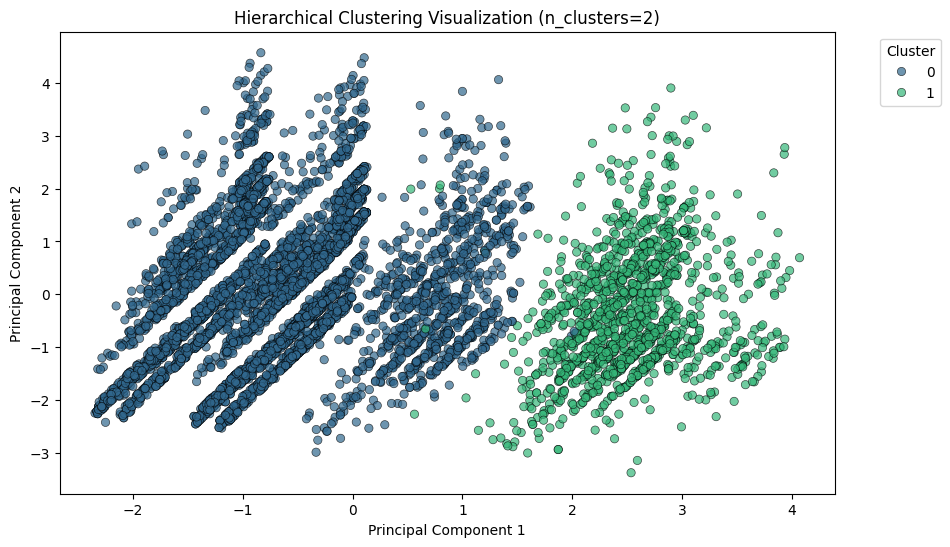

In [43]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
features = df_encoded.drop(columns=['Hierarchical_Cluster','GMM_Cluster','DBSCAN_Cluster','Cluster'])  # Exclude cluster column

best_score = -1
best_n = None
best_labels = None

# Experiment with different numbers of clusters
for n_clusters in range(2, 11):  # Testing cluster counts from 2 to 10
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical.fit_predict(features)
    score = silhouette_score(features, cluster_labels)
    
    if score > best_score:
        best_score = score
        best_n = n_clusters
        best_labels = cluster_labels

print(f'Best number of clusters: {best_n} with silhouette score: {best_score:.4f}')
df_encoded['Hierarchical_Cluster'] = best_labels

# Visualization of the best clustering result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=df_encoded['Hierarchical_Cluster'], palette='viridis', data=df_pca, alpha=0.7, edgecolor='k')
plt.title(f'Hierarchical Clustering Visualization (n_clusters={best_n})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Best number of clusters: 2 with silhouette score: 0.3070

#### Conclusion : 

When **K-Means** fails—often due to non-spherical clusters, varying cluster densities, or the presence of noise—alternative clustering methods can be more effective. 

**DBSCAN** works well when clusters have irregular shapes and varying densities, making it ideal for datasets with noise and outliers. 

**Gaussian Mixture Models** (GMM) provide a probabilistic approach, allowing for overlapping clusters and soft assignments, which is useful when data points belong to multiple groups with uncertainty.

**Agglomerative Hierarchical** Clustering is effective when the number of clusters is unknown, as it builds a tree-like structure that can be cut at different levels for analysis. These models offer flexibility and robustness in cases where K-Means struggles.

Since we got a very acceptable resut from K-Means with k=2 , we are going forward with this model

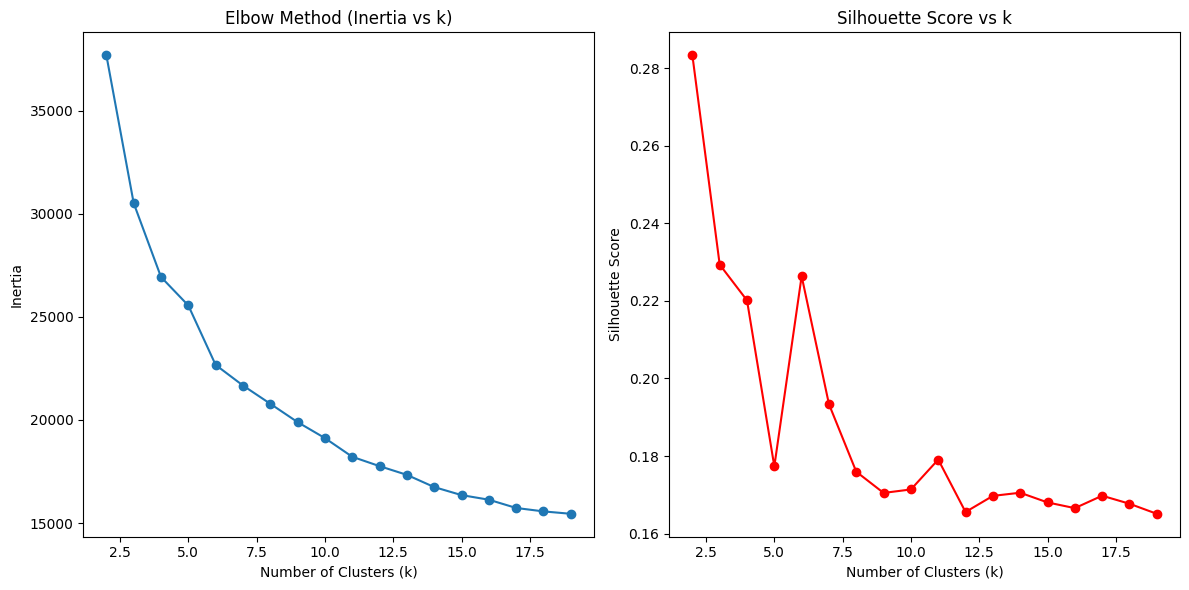

Best k based on Silhouette Score: 2


In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
features = df_encoded.drop(columns=['Hierarchical_Cluster','GMM_Cluster','DBSCAN_Cluster','Cluster'])  # Exclude cluster column

# Define the range for k (number of clusters)
k_range = range(2, 20)  # Let's try 2 to 10 clusters
inertia = []  # To store inertia (sum of squared distances)
silhouette_scores = []  # To store silhouette scores

# Loop through each k and compute inertia and silhouette score
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)  # Fit KMeans model
    inertia.append(kmeans.inertia_)  # Store inertia
    sil_score = silhouette_score(features, kmeans.labels_)  # Compute silhouette score
    silhouette_scores.append(sil_score)

# Plot the elbow method (inertia vs k)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method (Inertia vs k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot silhouette scores (score vs k)
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Output the best k based on silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Best k based on Silhouette Score: {best_k}')


**t-SNE** is a technique that reduces high-dimensional data into 2D/3D by preserving the local structure. It is commonly used for visualization, especially when you suspect the data has inherent clusters or patterns. 

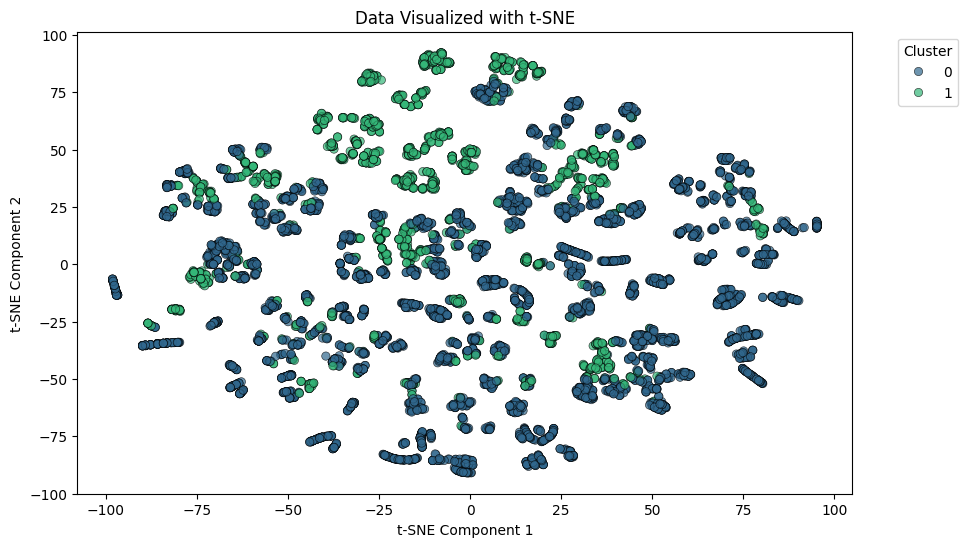

In [54]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Scale the features first
from sklearn.preprocessing import StandardScaler
features_scaled = StandardScaler().fit_transform(df_encoded.drop(columns=['Hierarchical_Cluster','GMM_Cluster','DBSCAN_Cluster','Cluster']))  # Exclude cluster column

# Perform t-SNE dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(features_scaled)

# Add t-SNE results to the DataFrame for visualization
df_encoded['tSNE_1'] = tsne_features[:, 0]
df_encoded['tSNE_2'] = tsne_features[:, 1]

# Visualize the t-SNE clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tSNE_1', y='tSNE_2', hue=df_encoded['Cluster'], palette='viridis', data=df_encoded, alpha=0.7, edgecolor='k')
plt.title('Data Visualized with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Seems like theres too much overlap for the clusters 

### Conclusion:

In this project, we have gone through a comprehensive data engineering pipeline to prepare the dataset for clustering. This included crucial steps such as data cleaning, handling missing values, and performing scaling and encoding of the features to ensure the data was in a suitable format for clustering algorithms.

We then ran several basic clustering algorithms, including K-Means, DBSCAN, and Agglomerative Clustering, experimenting with various parameter settings. Despite these efforts, we observed that none of the clustering methods yielded satisfactory results, as the clustering scores (e.g., silhouette score) were consistently low.

To gain further insight into the structure of the data, we visualized the dataset using t-SNE and UMAP for dimensionality reduction. These visualizations revealed that the data points did not form clear, distinct clusters, supporting our hypothesis that the data may not inherently contain separable groups.

Given the lack of meaningful clusters and the poor performance of the clustering algorithms, it became evident that this dataset is not suitable for clustering at this stage. Further exploration or a different approach, such as supervised learning, may be required to uncover patterns or insights within the data.